# This notebook contains:
	•	Feature Engineering
	•	Creating Returns & Moving Averages
	•	Saving Processed Data

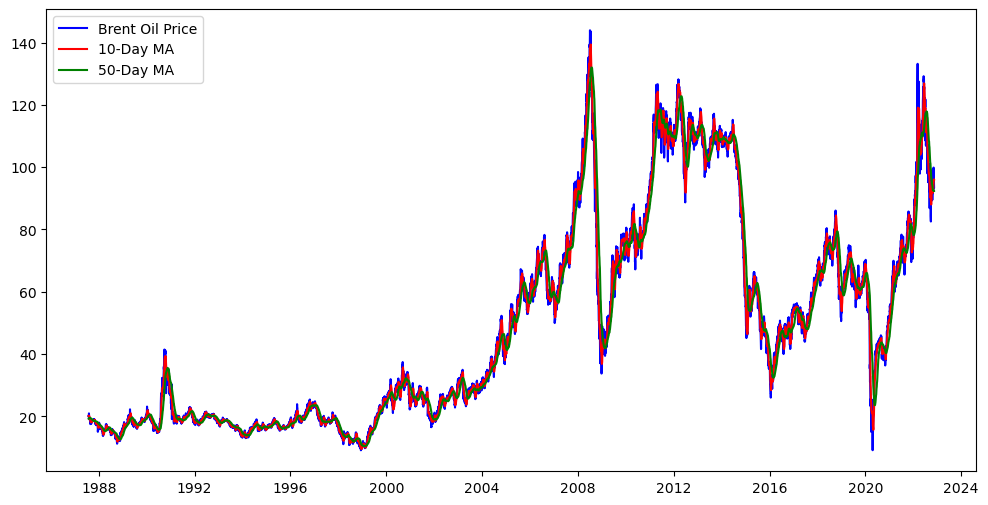

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("../data/processed/BrentOilCleaned.csv", parse_dates=["Date"], index_col="Date")

# Generate features
df["Returns"] = df["Price"].pct_change()
df["Log_Returns"] = np.log(df["Price"]).diff()
df["MA_10"] = df["Price"].rolling(window=10).mean()
df["MA_50"] = df["Price"].rolling(window=50).mean()

# Drop NA values
df.dropna(inplace=True)

# Save processed data
df.to_csv("../data/processed/BrentOilWith_features.csv")

# Plot moving averages
plt.figure(figsize=(12,6))
plt.plot(df["Price"], label="Brent Oil Price", color="blue")
plt.plot(df["MA_10"], label="10-Day MA", color="red")
plt.plot(df["MA_50"], label="50-Day MA", color="green")
plt.legend()
plt.show()